# Logistic Regression

**로지스틱 회귀(Logistic Regression)**는 선형 회귀에서 확장된 모델로, **분류 문제(Classification)**를 해결하기 위해 설계되었습니다. 출력값이 0과 1 사이의 확률로 나타나며, 주로 **이진 분류(Binary Classification)**에 사용됩니다.

---

## 로지스틱 회귀의 원리

1. **시그모이드 함수(Sigmoid Function)**:
   - 로지스틱 회귀는 선형 회귀 결과를 시그모이드 함수에 통과시켜 0~1 사이의 값으로 변환합니다.
   - 시그모이드 함수:
     \[
     \sigma(z) = \frac{1}{1 + e^{-z}}
     \]
     여기서 \( z = w^T X + b \) (선형 모델의 예측 값).

2. **결정 경계**:
   - 출력 확률 \( P(y=1|X) \)이 특정 임계값(일반적으로 0.5)을 넘으면 클래스 1로 분류.

3. **손실 함수 (Log Loss)**:
   - 로지스틱 회귀는 로그 손실(Log Loss)을 최소화하도록 가중치 \( w \)를 학습합니다.
   - 손실 함수:
     \[
     \text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
     \]

---

## 로지스틱 회귀의 장단점

### **장점**
1. **해석 용이**:
   - 가중치 \( w \)를 통해 특징의 중요도를 파악 가능.
2. **빠르고 효율적**:
   - 계산량이 적어 대규모 데이터에서도 빠르게 학습.
3. **확률 출력**:
   - 각 클래스의 확률을 제공하므로 해석력이 높음.

### **단점**
1. **선형 관계 가정**:
   - 특징과 출력 간의 선형 관계를 가정하므로 비선형 데이터에서는 성능 저하.
2. **다중공선성 문제**:
   - 특징 간 상관관계가 높을 경우 가중치 추정이 불안정.

---

## 로지스틱 회귀의 활용 사례
1. **의료 진단**:
   - 질병 여부 예측(예: 심장병, 당뇨병).
2. **금융**:
   - 대출 승인 여부, 신용 리스크 평가.
3. **마케팅**:
   - 이메일 스팸 필터링, 고객 이탈 분석.
4. **소셜 네트워크**:
   - 사용자 행동 예측(예: 클릭 여부).

---


## 1. Classification 

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



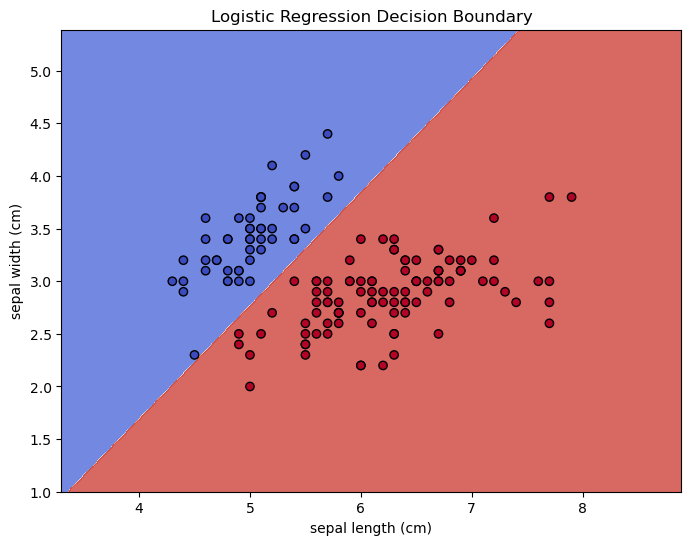

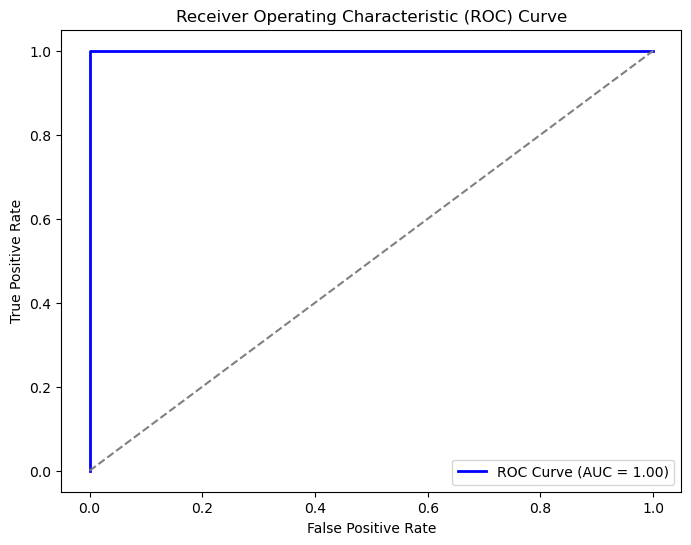

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = (iris.target != 0).astype(int)  # Binary classification (class 0 vs others)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization: Decision Boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

plot_decision_boundary(X, y, lr, "Logistic Regression Decision Boundary")

# Visualization: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()